In [1]:
from xgboost import XGBClassifier
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.model_selection import train_test_split

In [2]:
#Lectura de dataset
df = pd.read_csv("dataset_vehicle_wear.csv")
X = df.drop(columns=["Maintenance"])
y = df["Maintenance"]
#Separacion en datos de test y train
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    shuffle=False
)

In [3]:
#Intancia del modelo y entrenamiento
model = XGBClassifier(
    n_estimators=300,
    max_depth=4,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    eval_metric="logloss"
)
#Entrenamiento
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.05, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=4,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=300,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       103
           1       0.95      1.00      0.97        35

    accuracy                           0.99       138
   macro avg       0.97      0.99      0.98       138
weighted avg       0.99      0.99      0.99       138

ROC AUC: 1.0


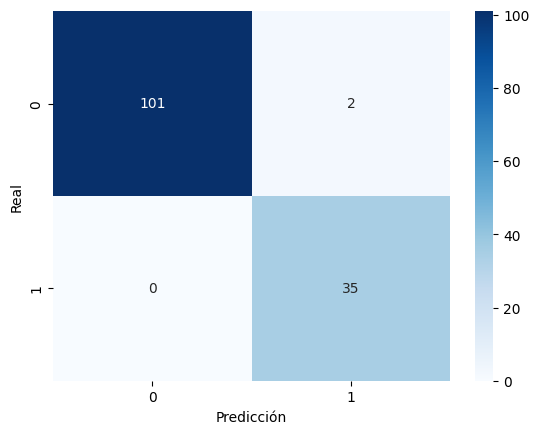

In [4]:
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]
#Evaluacion del modelo
print(classification_report(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_proba))
#Evaluacion por matriz de confusion
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()
